# Perceptron From Scratch

* The Perceptron algorithm is the simplest type of artificial neural network. It is a model of a single neuron that can be used for two-class classification problems and provides the foundation for later developing much larger networks.

* The Perceptron is inspired by the information processing of a single neural cell called a neuron. A neuron accepts input signals via its dendrites, which pass the electrical signal down to the cell body. In a similar way, the Perceptron receives input signals from examples of training data that we weight and combined in a linear equation called the **activation**.

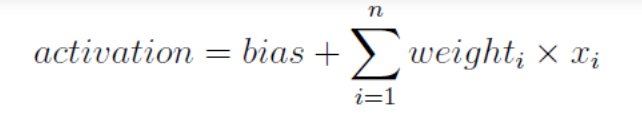

* The activation is then transformed into an output value or prediction using a transfer function, such as the step **transfer function**.

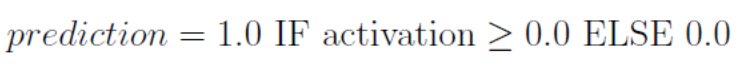

* In this way, the Perceptron is a classification algorithm for problems with two classes (0 and 1) where a linear equation (like a line or hyperplane) can be used to separate the two classes. It is closely related to linear regression and logistic regression that make predictions in a similar way (e.g. a weighted sum of inputs). The weights of the Perceptron algorithm must be estimated from your training data using **stochastic gradient descent**.

In [34]:
# Make a prediction with weights
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

## Calculate New Coefficients using Stochastic Gradient Descent

* The Perceptron algorithm uses gradient descent to update the weights. Each iteration of gradient descent, the weights (w) are updated using the equation:

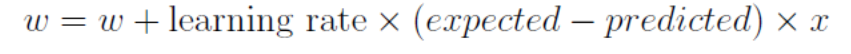

* Where w is weight being optimized, learning rate is a learning rate that you must configure (e.g. 0.01), (expected - predicted) is the prediction error for the model on the training data attributed to the weight and x is the input value.

In [35]:
# Estimate Perceptron weights using stochastic gradient descent
def train_weights(X_train, l_rate, n_epoch):
    weights = [0.0 for i in range(len(X_train[0]))]
    for _ in range(n_epoch):
        for row in X_train.values:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
    return weights

In [36]:
# Perceptron Algorithm With Stochastic Gradient Descent
def perceptron(X_train, test, l_rate, n_epoch):
    predictions = list()
    weights = train_weights(X_train, l_rate, n_epoch)
    for row in X_test.values:
        prediction = predict(row, weights)
        predictions.append(prediction)
    return(predictions)

In [37]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
df = pd.read_csv("Data/sonar.csv", header = None)

In [39]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [40]:
X = df.drop(60, axis=1)
y = df[60]

In [41]:
y.value_counts()

M    111
R     97
Name: 60, dtype: int64

In [42]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y.astype('str'))

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
l_rate = 0.1
n_epoch = 500

In [51]:
predictions = perceptron(X_train, X_test, l_rate, n_epoch)

In [52]:
print(accuracy_score(y_test, predictions))

0.5507246376811594
